# Multilayer Perceptron Neural Networks

### 2-2-1 MLP to learn XOR

With initial parameters - final prediction is 0,0,1,1, final loss = 0.126, correct predictions 2/4

- The result of the training is sensitive to the initialization of the weights.
> - Yes, since changing the random seed from 0 to 100 improved performance from 2/4 to 4/4 correct predictions. Different random starting points can make training easier or harder, because the initial weights determine how the model starts learning.
- The result of the training is sensitive to the learning rate.
> - Yes, using a smaller learning rate (0.01) resulted in only 3/4 correct predictions and a higher final loss (0.146). Learning rate controls how big the updates are. If its too small, learning is slow and may get stuck. if too large, the model may overshoot and fail to converge.
- The result of the training is sensitive to the number of epochs/weight updates.
> - Yes, increasing the number of epochs alone does not always guarantee better learning. If the initial weight initalisation is poor or if other hyperparameters like the learning rate are not suitable, the model may fail to converge properly even after many weight updates. In this case even increasing epochs to 30,000 did not help.
- The result of the training is sensitive to the scale of the (input) data.
>- scaling up -> model almost learned XOR but not fully
> - scaling down -> model barely learned, very high loss
> - sigmoid activation function sensitive to input size

| Scaling              | Final Predictions | Final Loss | Correct Predictions | Conclusion                          |
|:---------------------|:------------------|:-----------|:---------------------|:------------------------------------|
| Original X           | [0,0,1,1]          | 0.126      | 2/4                 | Model didn't fully learn XOR        |
| Scaled Up (×10)       | [0,1,1,1]          | 0.125      | 3/4                 | Model almost learned XOR, but made a mistake |
| Scaled Down (÷10)     | [0,0,1,1]          | 0.249      | 2/4                 | Model barely learned, very high loss |


In [28]:
import numpy as np

# --- Step 1: Define XOR input and expected output ---
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


y = np.array([[0], [1], [1], [0]])

# --- Step 2: Activation function and its derivative ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  # squashes input to range (0, 1)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)  # derivative of sigmoid

# --- Step 3: Matrix multiplication using nested loops ---
def matmul(A, B):
    rows, cols = A.shape[0], B.shape[1]
    result = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            for k in range(A.shape[1]):
                result[i][j] += A[i][k] * B[k][j]
    return result

# --- Step 4: Initialize weights and biases ---
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1

# Random weights, zeros for biases
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# --- Step 5: Training loop ---
#initially 10k
epochs = 10000
learning_rate = 0.1

for epoch in range(epochs):
    # === Forward pass ===
    # Hidden layer
    z1 = matmul(X, W1) + b1            # Linear combination: z = XW + b
    a1 = sigmoid(z1)                   # Activation

    # Output layer
    z2 = matmul(a1, W2) + b2
    a2 = sigmoid(z2)

    # === Compute loss (Mean Squared Error) ===
    loss = np.mean((a2 - y) ** 2)

    # === Backpropagation ===

    # Output layer gradient
    d_a2 = 2 * (a2 - y)                        # Derivative of loss w.r.t. output
    d_z2 = d_a2 * sigmoid_derivative(z2)       # Chain rule: dL/dz2

    # Gradients for W2 and b2
    dW2 = matmul(a1.T, d_z2)                   # dL/dW2
    db2 = np.sum(d_z2, axis=0, keepdims=True)  # dL/db2

    # Backprop to hidden layer
    d_a1 = matmul(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(z1)

    # Gradients for W1 and b1
    dW1 = matmul(X.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    # === Update weights and biases using gradient descent ===
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

    # === Print progress ===
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# --- Step 6: Output predictions after training ---
print("\nFinal predictions:")
z1 = matmul(X, W1) + b1
a1 = sigmoid(z1)
z2 = matmul(a1, W2) + b2
a2 = sigmoid(z2)
print(np.round(a2))  # Should be close to [0, 1, 1, 0]
print("Final loss:", loss)


# --- Step 7: Evaluate accuracy ---
expected = y
predicted = np.round(a2)

correct = np.sum(predicted == expected)
total = len(expected)
wrong = total - correct

print(f"\nCorrect predictions: {correct}/{total}")
print(f"Incorrect predictions: {wrong}/{total}")


Epoch 0, Loss: 0.2696
Epoch 1000, Loss: 0.1461
Epoch 2000, Loss: 0.1329
Epoch 3000, Loss: 0.1296
Epoch 4000, Loss: 0.1281
Epoch 5000, Loss: 0.1274
Epoch 6000, Loss: 0.1269
Epoch 7000, Loss: 0.1266
Epoch 8000, Loss: 0.1264
Epoch 9000, Loss: 0.1262

Final predictions:
[[0.]
 [0.]
 [1.]
 [1.]]
Final loss: 0.12604414884050008

Correct predictions: 2/4
Incorrect predictions: 2/4


In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.io import loadmat

# Mount google colab to drive to access to the dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Training MLP on MNIST data

dict_keys(['__header__', '__version__', '__globals__', 'train_labels', 'train_X'])
dict_keys(['__header__', '__version__', '__globals__', 'test_labels', 'test_X'])


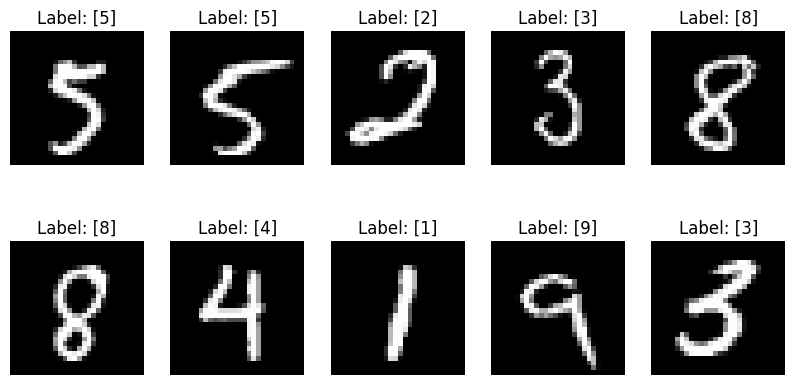

In [57]:
# Load .mat file
train_data = loadmat('/content/drive/MyDrive/comp4702/mnist_train.mat')
test_data = loadmat('/content/drive/MyDrive/comp4702/mnist_test.mat')

# figuring out what cols we have
print(train_data.keys())
print(test_data.keys())

# TODO: Extract the images and labels
train_images = train_data['train_X']
train_labels = train_data['train_labels'] - 1 # since matlab indexes at 1
test_images = test_data['test_X']
test_labels = test_data['test_labels'] - 1

# TODO: Reshape the images to their original 28x28 format
images_reshaped = train_images.reshape(-1, 28, 28)

# Visualize the first few images along with their labels
plt.figure(figsize=(10, 5))
for i in range(10):  # Visualize 10 samples
    plt.subplot(2, 5, i + 1)
    random_integer = random.randint(0, len(train_images))
    plt.imshow(images_reshaped[random_integer], cmap='gray')
    plt.title(f"Label: {train_labels[random_integer]}")
    plt.axis('off')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


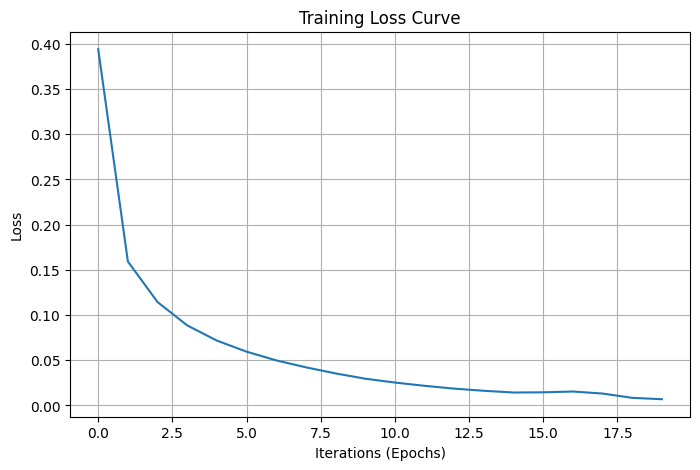

Accuracy: 97.24%


In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# TODO: Standardize the features by removing the mean and scaling to unit variance
# mlps converge faster when the inputs are standardised
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_images)
X_test_scaled = scaler.transform(test_images)

# TODO: Train the classifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(64,),   # <-- DESIGN CHOICE: 1 hidden layer with 64 neurons (simple architecture for small image tasks)
    activation='relu',          # <-- DESIGN CHOICE: ReLU activation (faster than sigmoid)
    solver='adam',              # <-- DESIGN CHOICE: Adam optimizer (adapts to learning rate automatically)
    max_iter=20,                # <-- DESIGN CHOICE: Train for 20 epochs (might change this)
    random_state=42             # <-- Random seed
)

# TODO: Train the classifier
mlp_clf.fit(X_train_scaled, train_labels) # direct fit on all training data, could also use split train/validation

# graphing
plt.figure(figsize=(8, 5))
plt.plot(mlp_clf.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# TODO: Predict on the test set
test_preds = mlp_clf.predict(X_test_scaled)

# TODO: Calculate the accuracy
accuracy = accuracy_score(test_labels, test_preds)
print(f"Accuracy: {accuracy*100:.2f}%")


# did not converge but its okay. this only indicates it could get better by increasing max_iter
# training loss curve is good -- starts high and decreases over time smoothly
# accuracy 97.24

# visualising prediction

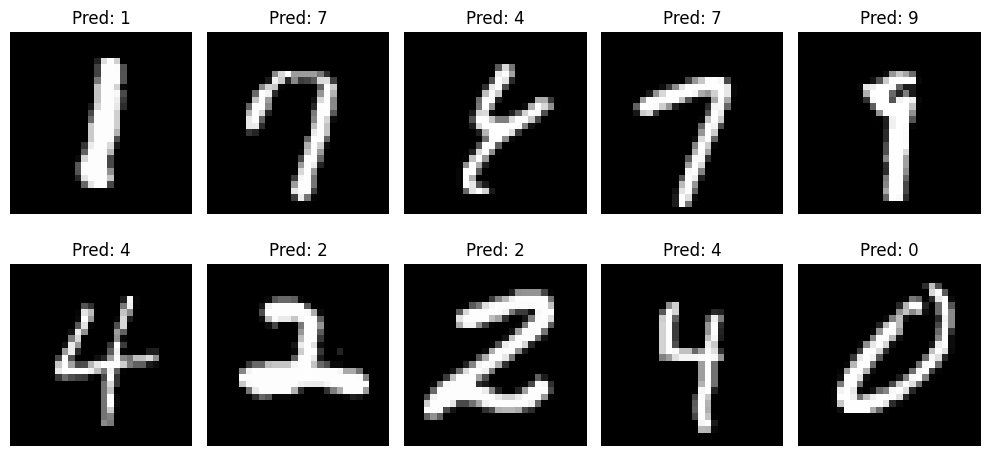

In [59]:

# Randomly choose 10 samples to visualize
indices = random.sample(range(len(test_images)), 10)
samples = test_images[indices]
true_labels = test_labels[indices]

# TODO: Make prediction for samples
samples_scaled = scaler.transform(samples)
predicted_labels = mlp_clf.predict(samples_scaled)
# Plotting
plt.figure(figsize=(10, 5))
for i in range(10):
    img = samples[i].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Pred: {predicted_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# visualising 9 rows of the weight matrix

The weight matrix connecting the input layer to the first hidden layer was extracted. Each column represents the weights from all 784 input pixels to a single hidden neuron. 9 randomly selected neurons were visualised by reshaping and normalising their weights into 28x28 grayscale images. This gives a sense of which regions of the input digits each hidden neuron is sensitive to (seems to be strokes, curves, edges etc).

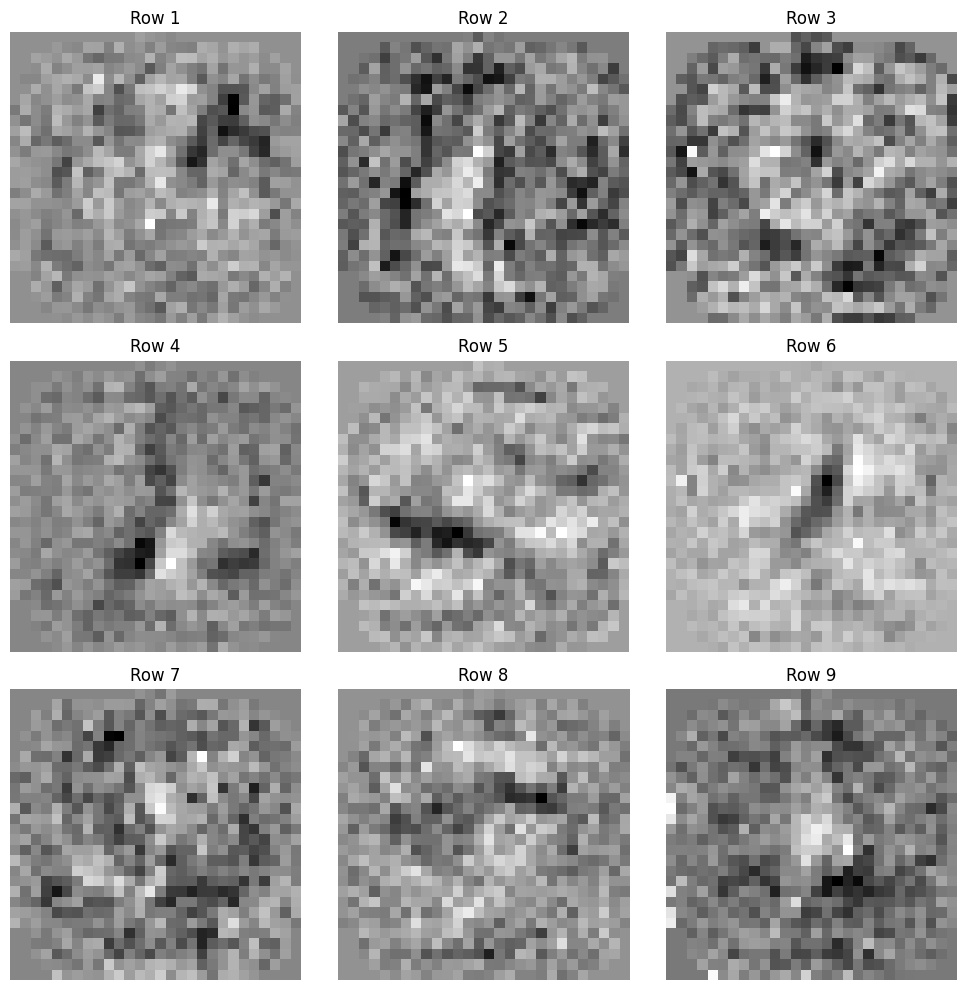

In [62]:
# TODO: Get the weight matrix of the first hidden layer
weight_matrix = mlp_clf.coefs_[0]

# Visualize 9 rows of the weight matrix
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)

    # select the ith neuron (ith col of weightmatrix)
    weights = weight_matrix[:, i]

    # TODO: Normalize the weights to [0, 1] or grayscale will look weird
    weights_normalized = (weights - np.min(weights)) / (np.max(weights) - np.min(weights))

    # TODO: Reshape the weights to 28x28 to visualize as an image
    weights_image = weights_normalized.reshape(28, 28)

    # Visualise the weights
    plt.imshow(weights_image, cmap='gray',vmin=0, vmax=1)
    plt.title(f"Row {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()